<a href="https://colab.research.google.com/github/DeathSlayer1707/random_gigs/blob/main/RAJ_XGBoost_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/meltpool_dataset.csv")
print(df.head())

   Laser Power (W)  Scan Speed (mm/s)  Beam Diameter (mm)  \
0       249.816047          96.283232            1.023411   
1       480.285723         185.475237            0.993958   
2       392.797577         268.236459            2.312509   
3       339.463394         233.056222            0.999092   
4       162.407456         251.640287            1.043899   

   Cooling Rate (°C/s)  Shielding Gas Composition (%)  \
0          1172.702994                      57.199588   
1          1296.681397                      80.543233   
2           750.467899                      76.016093   
3          1124.874100                      15.389990   
4          1071.745983                      14.924947   

   Melt Pool Intensity (mm)  Melt Pool Width (mm)     Defect Type  
0                  0.651090              1.366863  Uneven Surface  
1                  0.762810              0.510295        Porosity  
2                  1.296366              1.770310  Uneven Surface  
3                 

In [ ]:
# Remove rows with NaN in 'Defect Type' before encoding
df_cleaned = df.dropna(subset=['Defect Type']).copy()

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df_cleaned['Defect Type'])

In [ ]:
# Train-validation split
from sklearn.model_selection import train_test_split
X = df.drop('Defect Type', axis=1)
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X, y_train, test_size=0.2, stratify=y_train, random_state=42
)

NameError: name 'y_train' is not defined

In [ ]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=300, learning_rate=0.1, max_depth=6)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Define pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',model)
])

# Parameter grid to search
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 1],
    'xgb__colsample_bytree': [0.7, 1]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

In [ ]:
# early_stop = EarlyStopping(monitor='val_loss', restore_best_weights=True)
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

[0]	validation_0-mlogloss:1.06591
[1]	validation_0-mlogloss:1.03567
[2]	validation_0-mlogloss:1.01143
[3]	validation_0-mlogloss:0.98536
[4]	validation_0-mlogloss:0.96123
[5]	validation_0-mlogloss:0.93639
[6]	validation_0-mlogloss:0.91321
[7]	validation_0-mlogloss:0.88971
[8]	validation_0-mlogloss:0.87322
[9]	validation_0-mlogloss:0.85643
[10]	validation_0-mlogloss:0.82805
[11]	validation_0-mlogloss:0.80802
[12]	validation_0-mlogloss:0.78910
[13]	validation_0-mlogloss:0.77421
[14]	validation_0-mlogloss:0.75611
[15]	validation_0-mlogloss:0.74234
[16]	validation_0-mlogloss:0.72886
[17]	validation_0-mlogloss:0.71634
[18]	validation_0-mlogloss:0.70034
[19]	validation_0-mlogloss:0.68871
[20]	validation_0-mlogloss:0.67522
[21]	validation_0-mlogloss:0.65809
[22]	validation_0-mlogloss:0.64372
[23]	validation_0-mlogloss:0.63521
[24]	validation_0-mlogloss:0.62426


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[25]	validation_0-mlogloss:0.61619
[26]	validation_0-mlogloss:0.60418
[27]	validation_0-mlogloss:0.59678
[28]	validation_0-mlogloss:0.58183
[29]	validation_0-mlogloss:0.56932
[30]	validation_0-mlogloss:0.56261
[31]	validation_0-mlogloss:0.55259
[32]	validation_0-mlogloss:0.54614
[33]	validation_0-mlogloss:0.54082
[34]	validation_0-mlogloss:0.53383
[35]	validation_0-mlogloss:0.52145
[36]	validation_0-mlogloss:0.51486
[37]	validation_0-mlogloss:0.50558
[38]	validation_0-mlogloss:0.49864
[39]	validation_0-mlogloss:0.48832
[40]	validation_0-mlogloss:0.48155
[41]	validation_0-mlogloss:0.47543
[42]	validation_0-mlogloss:0.46462
[43]	validation_0-mlogloss:0.46045
[44]	validation_0-mlogloss:0.45606
[45]	validation_0-mlogloss:0.44692
[46]	validation_0-mlogloss:0.44083
[47]	validation_0-mlogloss:0.43434
[48]	validation_0-mlogloss:0.42930
[49]	validation_0-mlogloss:0.42566
[50]	validation_0-mlogloss:0.41861
[51]	validation_0-mlogloss:0.40992
[52]	validation_0-mlogloss:0.40709
[53]	validation_0-ml

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test_scaled)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

✅ Accuracy: 0.36363636363636365
                precision    recall  f1-score   support

        Cracks       0.38      0.32      0.35        47
      Porosity       0.35      0.34      0.34        56
Uneven Surface       0.37      0.43      0.40        51

      accuracy                           0.36       154
     macro avg       0.37      0.36      0.36       154
  weighted avg       0.36      0.36      0.36       154



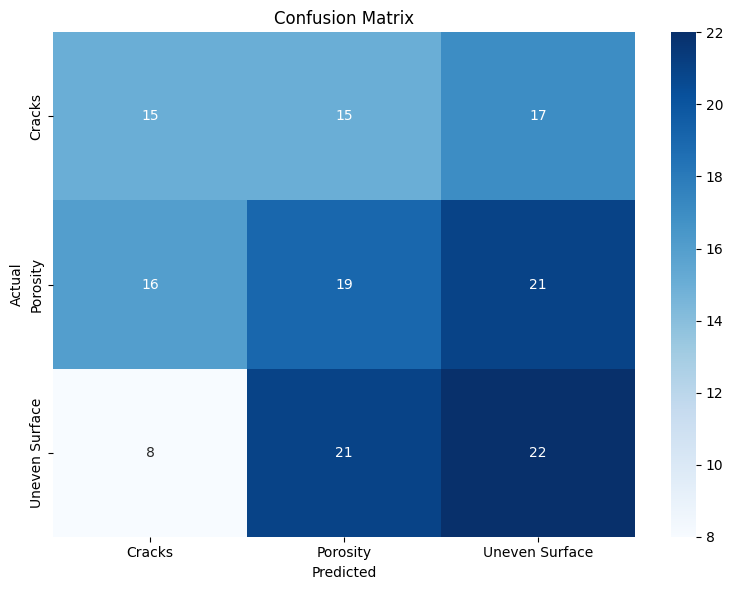

In [ ]:
# 📊 Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()